In [135]:
import matplotlib.pyplot as plt

In [134]:
from nltk.stem.wordnet import WordNetLemmatizer

import nltk  # FreqDist, word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

import string

[nltk_data] Downloading package punkt to /Users/Rich/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Rich/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import sqlite3

In [3]:
conn = sqlite3.connect('jobs.db')
c = conn.cursor()

In [5]:
c.execute("""SELECT company, description FROM listings""")

rows = c.fetchall()

print(len(rows))

980


In [6]:
rows[0]

(0,
 'Data Scientist',
 'Datadog',
 'New York, NY',
 "About DatadogWe're on a mission to build the best platform in the world for engineers to understand and scale their systems, applications, and teams. We operate at high scale—trillions of data points per day—providing always-on alerting, metrics visualization, logs, and application tracing for tens of thousands of companies. Our engineering culture values pragmatism, honesty, and simplicity to solve hard problems the right way.The OpportunityYou will have a fantastic team of data engineers to support you, a collaborative environment to encourage your work, and the best technologies for performing data science at high scale in your toolkit.You Will Present the latest academic research papers to your team. Research and benchmark the latest algorithms that can be used for our particular use-cases. Apply machine learning algorithms and statistical techniques to build new product features. Deploy a new feature to production, instantly af

In [11]:
c.execute("""SELECT company, description FROM listings""")

rows = c.fetchall()

print(rows[0][1])

About DatadogWe're on a mission to build the best platform in the world for engineers to understand and scale their systems, applications, and teams. We operate at high scale—trillions of data points per day—providing always-on alerting, metrics visualization, logs, and application tracing for tens of thousands of companies. Our engineering culture values pragmatism, honesty, and simplicity to solve hard problems the right way.The OpportunityYou will have a fantastic team of data engineers to support you, a collaborative environment to encourage your work, and the best technologies for performing data science at high scale in your toolkit.You Will Present the latest academic research papers to your team. Research and benchmark the latest algorithms that can be used for our particular use-cases. Apply machine learning algorithms and statistical techniques to build new product features. Deploy a new feature to production, instantly affecting customers with your work. Mentor other data sc

#### Observing data

In [15]:
import random

In [63]:
rand_entry = random.randint(0,len(rows))
entry = rows[rand_entry][1]
print(entry)
print('---')
print(len(entry))

Summary:As a Manager- Precision Medicine you will work closely with Director, Precision Medicine and other key personnel to implement and operationalize Precision Medicine goals within Regeneron's clinical trials. Manages central laboratory and specialty vendors on clinical trials. Presents at investigators meetings and builds training materials (Lab Manual, Sample Collection Procedures, presentation slides, etc.). Supports and/or manages Senior Associates and Associate Managers to execute team the organizations goals.Job ResponsibilitiesStudy Team SupportParticipates in cross-functional study teams and sub-teams.Manages acquisition of clinical trial samples designated for biomarkers, precision medicine and/or exploratory research under supervision of more senior personnel.Supports individual clinical study teams as the need arises for all technical and operational sample-related matters for assigned projects by collaborating closely with internal partners.Operational Support of Biomar

#### Notes:
- Overall there are just text datas
- Some entries have hyphens, bullet points 
- Some words are mashed together
- Most entries are quite long (atleast 1000 chars long)
- Some entries have the "This company is an Equal Opportunity provider . . .. "
- See "Show more Show less often

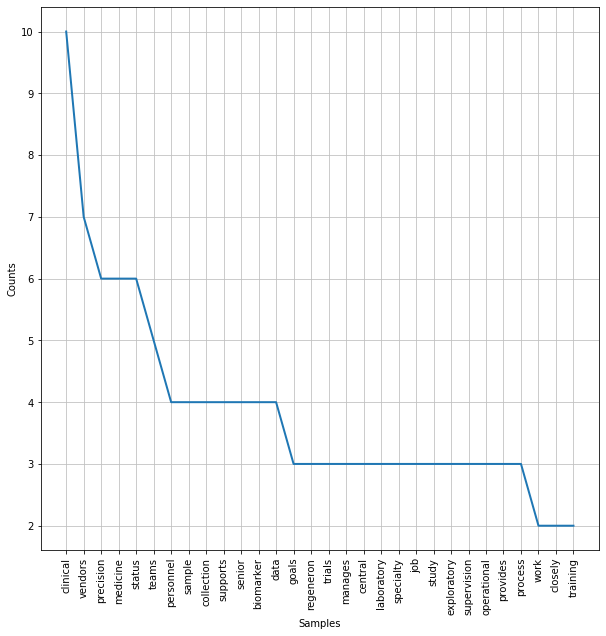

In [99]:
fdist = FreqDist(stopwords_removed)
plt.figure(figsize=(10,10))
fdist.plot(30)

# Get all the data into an array

In [103]:
import pandas as pd

In [144]:
c.execute("""SELECT title,company,location,description FROM data_scientist_postings""")

rows = c.fetchall()

In [145]:
rows[0]

('Data Scientist',
 'Datadog',
 'New York, NY',
 "About DatadogWe're on a mission to build the best platform in the world for engineers to understand and scale their systems, applications, and teams. We operate at high scale—trillions of data points per day—providing always-on alerting, metrics visualization, logs, and application tracing for tens of thousands of companies. Our engineering culture values pragmatism, honesty, and simplicity to solve hard problems the right way.The OpportunityYou will have a fantastic team of data engineers to support you, a collaborative environment to encourage your work, and the best technologies for performing data science at high scale in your toolkit.You Will Present the latest academic research papers to your team. Research and benchmark the latest algorithms that can be used for our particular use-cases. Apply machine learning algorithms and statistical techniques to build new product features. Deploy a new feature to production, instantly affect

In [149]:
rows[0]

('Data Scientist',
 'Datadog',
 'New York, NY',
 "About DatadogWe're on a mission to build the best platform in the world for engineers to understand and scale their systems, applications, and teams. We operate at high scale—trillions of data points per day—providing always-on alerting, metrics visualization, logs, and application tracing for tens of thousands of companies. Our engineering culture values pragmatism, honesty, and simplicity to solve hard problems the right way.The OpportunityYou will have a fantastic team of data engineers to support you, a collaborative environment to encourage your work, and the best technologies for performing data science at high scale in your toolkit.You Will Present the latest academic research papers to your team. Research and benchmark the latest algorithms that can be used for our particular use-cases. Apply machine learning algorithms and statistical techniques to build new product features. Deploy a new feature to production, instantly affect

In [151]:
df = pd.DataFrame(rows, columns = ['Title','Company','Location','Description'])

In [152]:
df.head()

,Title,Company,Location,Description
0,Data Scientist,Datadog,"New York, NY",About DatadogWe're on a mission to build the b...
1,Data Scientist- Analytics,OkCupid,"New York, NY",OkCupid is looking for an analyst to contribut...
2,Data Scientist,IBM,"New York, NY","IntroductionAs a Data Scientist at IBM, you wi..."
3,"Data Scientist, Advertising Business",Spotify,"New York, NY","Music for everyone, no credit card needed. It’..."
4,"Data Scientist, Analytics",Facebook,"New York, NY",Facebook's mission is to give people the power...


In [179]:
#Target 1 for data science position. This will be goal position
df['Target'] = 1 

In [180]:
df.head()

,Title,Company,Location,Description,Target
0,Data Scientist,Datadog,"New York, NY",About DatadogWe're on a mission to build the b...,1
1,Data Scientist- Analytics,OkCupid,"New York, NY",OkCupid is looking for an analyst to contribut...,1
2,Data Scientist,IBM,"New York, NY","IntroductionAs a Data Scientist at IBM, you wi...",1
3,"Data Scientist, Advertising Business",Spotify,"New York, NY","Music for everyone, no credit card needed. It’...",1
4,"Data Scientist, Analytics",Facebook,"New York, NY",Facebook's mission is to give people the power...,1


In [166]:
c.execute("""SELECT title,company,location,description FROM non_data_scientist_postings;""")

rows = c.fetchall()

In [167]:
df2 = pd.DataFrame(rows, columns = ['Title','Company','Location','Description'])

In [168]:
df2['Target'] = 0

In [169]:
df2.head()

,Title,Company,Location,Description,Target
0,Confidential Investigator,New York City Department of Investigation,"New York, NY",Job Description The New York City Department o...,0
1,"Program Coordinator, Workplace Center - Columb...",Columbia University in the City of New York,"New York, NY",Requisition no: 507997 Work Type: Full Time Lo...,0
2,Think you can help? Tell us how,Brooklinen,"New York, NY",OverviewDon't see any openings that are a matc...,0
3,"Editorial Assistant, Aladdin Books","Barnes & Noble, Inc.","New York, NY",REF#: 37435CBS BUSINESS UNIT: Simon & Schuster...,0
4,Public Relations Assistant,Reesby,"New York, NY",About ReesbyReesby are a premium emerging tech...,0


In [204]:
full_df = pd.concat([df,df2], axis = 0, ignore_index = True)

In [205]:
full_df.head()

,Title,Company,Location,Description,Target
0,Data Scientist,Datadog,"New York, NY",About DatadogWe're on a mission to build the b...,1
1,Data Scientist- Analytics,OkCupid,"New York, NY",OkCupid is looking for an analyst to contribut...,1
2,Data Scientist,IBM,"New York, NY","IntroductionAs a Data Scientist at IBM, you wi...",1
3,"Data Scientist, Advertising Business",Spotify,"New York, NY","Music for everyone, no credit card needed. It’...",1
4,"Data Scientist, Analytics",Facebook,"New York, NY",Facebook's mission is to give people the power...,1


In [206]:
full_df.tail()

,Title,Company,Location,Description,Target
1974,Data Scientist,Point72,"New York, NY",A Career with Point72’s MI Data teamAt Point72...,0
1975,Campaign Manager -New York City,adMarketplace,"New York, NY",About AdMarketplaceWith 20 years of search mar...,0
1976,Ramp Agent,Council for Airport Opportunity,"Newark, NJ",The Council for Airport Opportunity is seeking...,0
1977,Showroom Assistant,Farrow & Ball,"Greenwich, CT","Farrow & Ball - Showroom Assistant, Greenwich ...",0
1978,Case Aide - UC,Cayuga Centers,"New York, NY",Job DescriptionTo support staff in supervising...,0


In [263]:
full_df.dropna(inplace= True)

In [243]:
def clean_n_tokenize(description, stopwords, n = 1):
    '''return a tokenized description with removed stopwords. n grams default = 1'''
    tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
    tokenized_list = tokenizer.tokenize(description)
    _ = []
    if n > 1:
        i = 0
        
        while i < len(tokenized_list):
            _.append(' '.join(tokenized_list[i:i+n]))
            i += 1
    tokenized_list += _
    return [token.lower() for token in tokenized_list if token.lower() not in stopwords]

In [230]:
tokenized_list[:5]

['Summary', 'As', 'a', 'Manager', 'Precision']

In [211]:
list_stopwords = stopwords.words('english')
list_stopwords += list(string.punctuation)
list_stopwords += ['show','company','description','summary','less','show','more','moreshow','how']

In [231]:
clean_n_tokenize(full_df['Description'][1], list_stopwords, n = 2)

['okcupid',
 'looking',
 'analyst',
 'contribute',
 'data',
 'driven',
 'organization',
 'enjoy',
 'working',
 'product',
 'helps',
 'millions',
 'people',
 'find',
 'love',
 'get',
 'great',
 'sense',
 'satisfaction',
 'seeing',
 'hard',
 'work',
 'make',
 'difference',
 'kind',
 'thing',
 'appeals',
 'probably',
 'good',
 'fit',
 'okcupidabout',
 'team',
 'okcupid',
 'analytics',
 'function',
 'close',
 'knit',
 'team',
 '4',
 'sit',
 'embedded',
 'various',
 'business',
 'functions',
 'bring',
 'diverse',
 'unique',
 'experience',
 'team',
 'team',
 'handles',
 'aspects',
 'analytics',
 'life',
 'cycle',
 'including',
 'data',
 'modelling',
 'warehousing',
 'reporting',
 'traditional',
 'analytics',
 'statistical',
 'modeling',
 'role',
 'partner',
 'product',
 'managers',
 'senior',
 'leadership',
 'recommend',
 'appropriate',
 'actionsutilize',
 'statistical',
 'modelling',
 'techniques',
 'appropriate',
 'drive',
 'business',
 'decisionsown',
 'experimentation',
 'product',
 'tea

In [266]:
corpus = [set(clean_n_tokenize(description, list_stopwords, 2)) for description in full_df['Description']]

In [267]:
corpus[:5]

[{'2',
  '2 years',
  'a bs',
  'a collaborative',
  'a fantastic',
  'a fast',
  'a language',
  'a mission',
  'a new',
  'a production',
  'a scientific',
  'a service',
  'about code',
  'about datadogwe',
  'academic',
  'academic research',
  'affecting',
  'affecting customers',
  'alerting',
  'alerting metrics',
  'algebra',
  'algebra you',
  'algorithms',
  'algorithms and',
  'algorithms in',
  'algorithms that',
  'always',
  'always on',
  'analysis',
  'analysis show',
  'and algorithms',
  'and application',
  'and benchmark',
  'and find',
  'and fix',
  'and performance',
  'and scale',
  'and simplicity',
  'and spark',
  'and statistical',
  'and teams',
  'and the',
  'and thrive',
  'application',
  'application tracing',
  'applications',
  'applications and',
  'apply',
  'apply machine',
  'applying',
  'applying machine',
  'are fluent',
  'as python',
  'at high',
  'autonomy',
  'autonomy you',
  'backend',
  'backend programming',
  'be used',
  'benchmark'